In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_66332/2802708398.py:9: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
pd.set_option("display.width", 70)

In [4]:
data = pd.read_csv("datasets/cars.csv")

In [5]:
data.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [6]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [7]:
data.shape

(2499, 13)

In [8]:
data.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


# **Визуальное исследование датасета**

Оценим распределение целевого признака — оценки по математике:

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_66332/2055821964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["price"]);


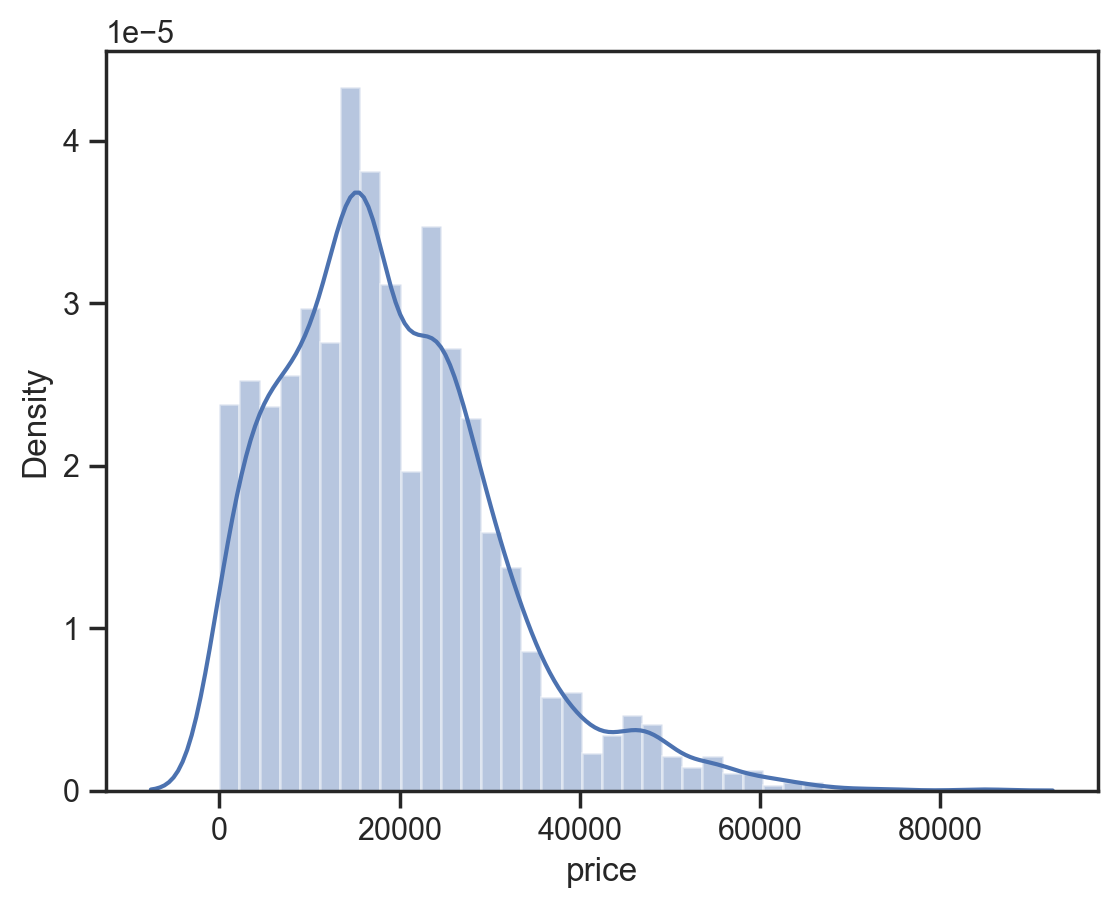

In [9]:
sns.distplot(data["price"]);

<Axes: xlabel='year'>

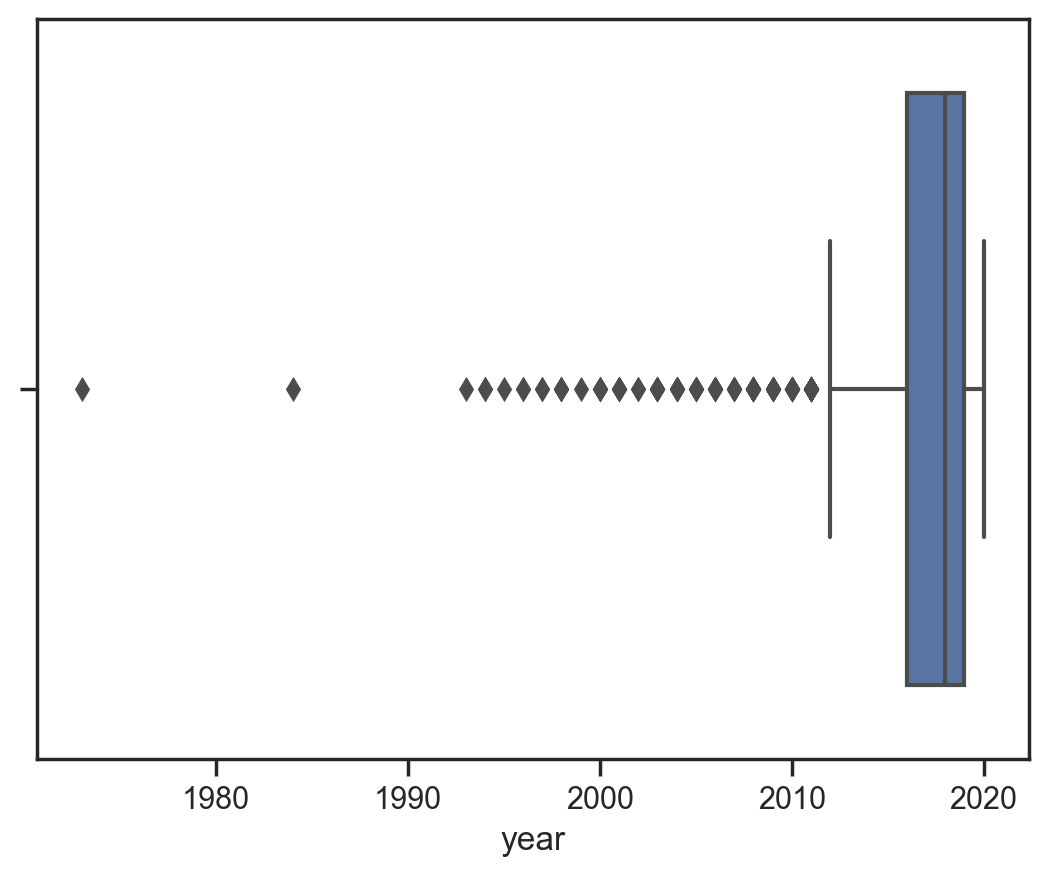

In [10]:
sns.boxplot(x=data['year'])

<Axes: xlabel='price', ylabel='Density'>

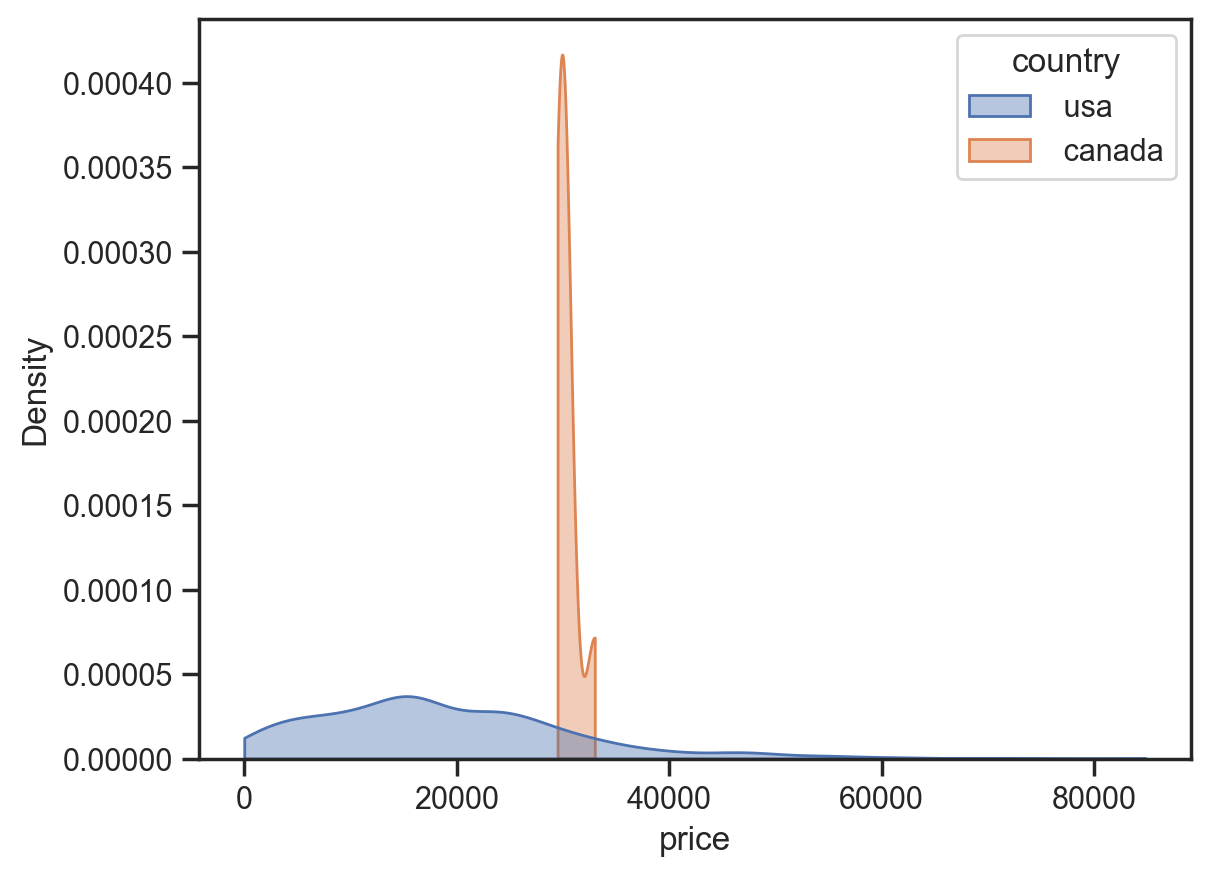

In [11]:
sns.kdeplot(data=data, x="price", hue="country", cut=0, fill=True, common_norm=False, alpha=0.4)

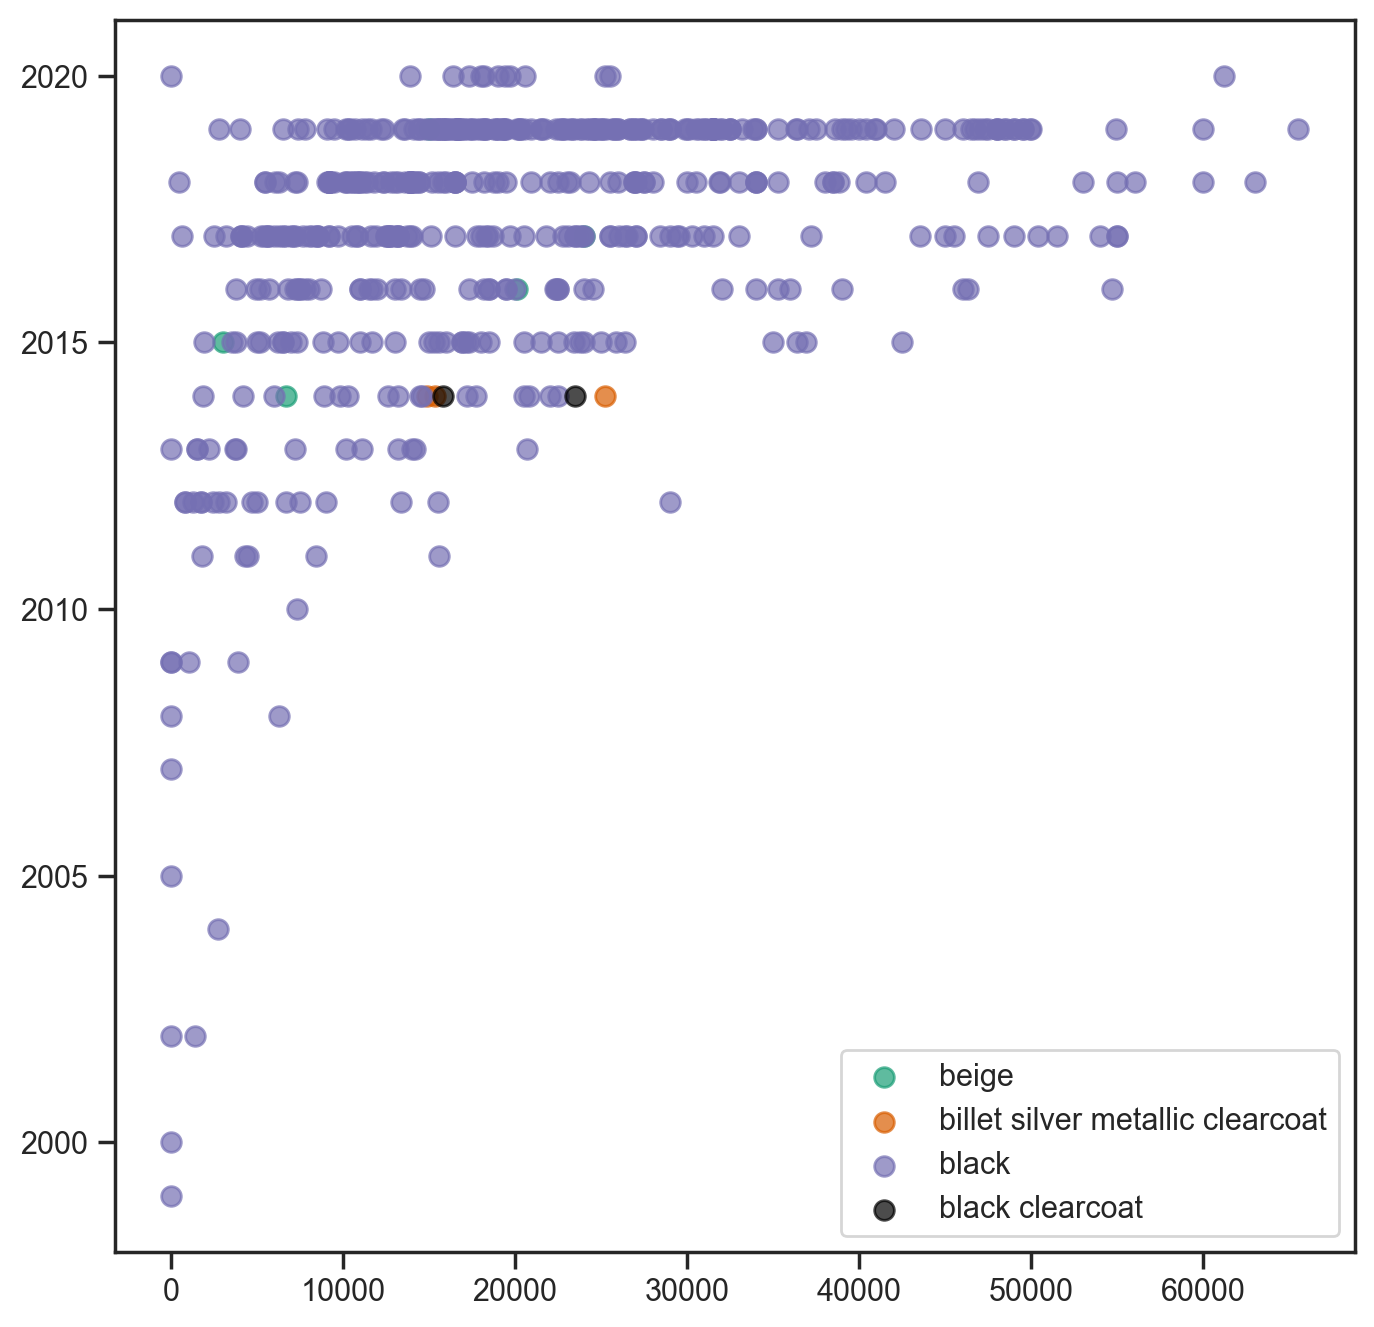

In [12]:
import numpy as np
import matplotlib.pyplot as plt
FLIPPER_LENGTH = data["price"].values
BILL_LENGTH = data["year"].values

SPECIES = data["color"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3", "#000000"]

fig, ax = plt.subplots(figsize=(8,8))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
    
ax.legend();

/var/folders/fs/5xh23h99763f_blp7m50x23h0000gq/T/ipykernel_66332/32137796.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x="year", hue="brand", cut=0, fill=True, common_norm=False, alpha=0.4)


<Axes: xlabel='year', ylabel='Density'>

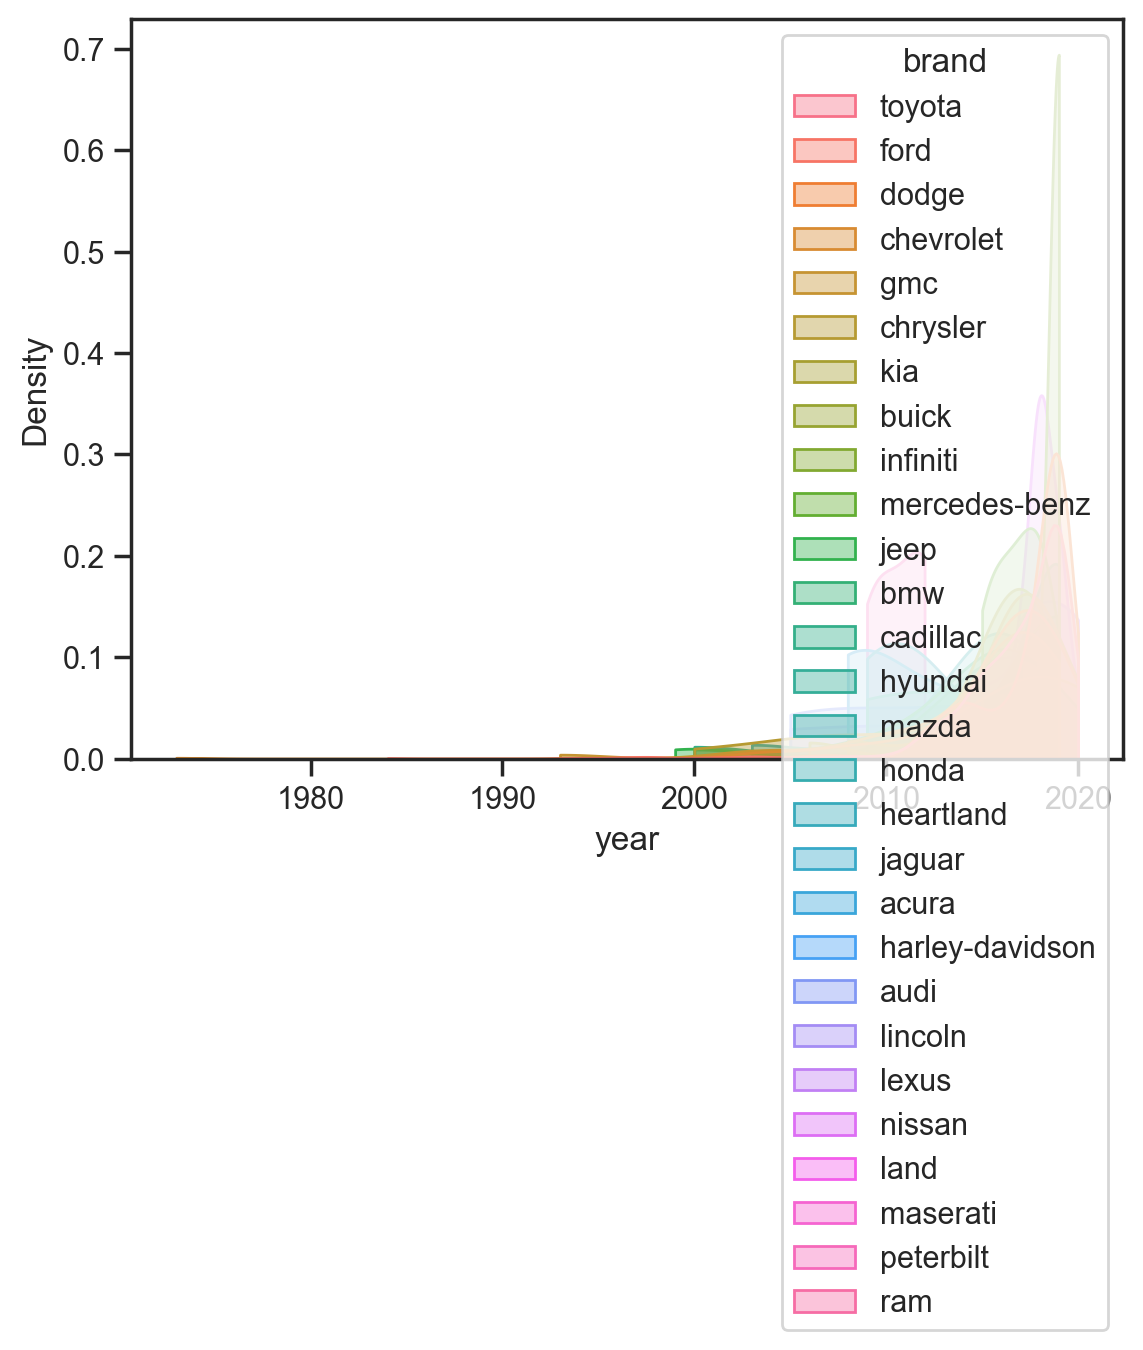

In [13]:
sns.kdeplot(data=data, x="year", hue="brand", cut=0, fill=True, common_norm=False, alpha=0.4)

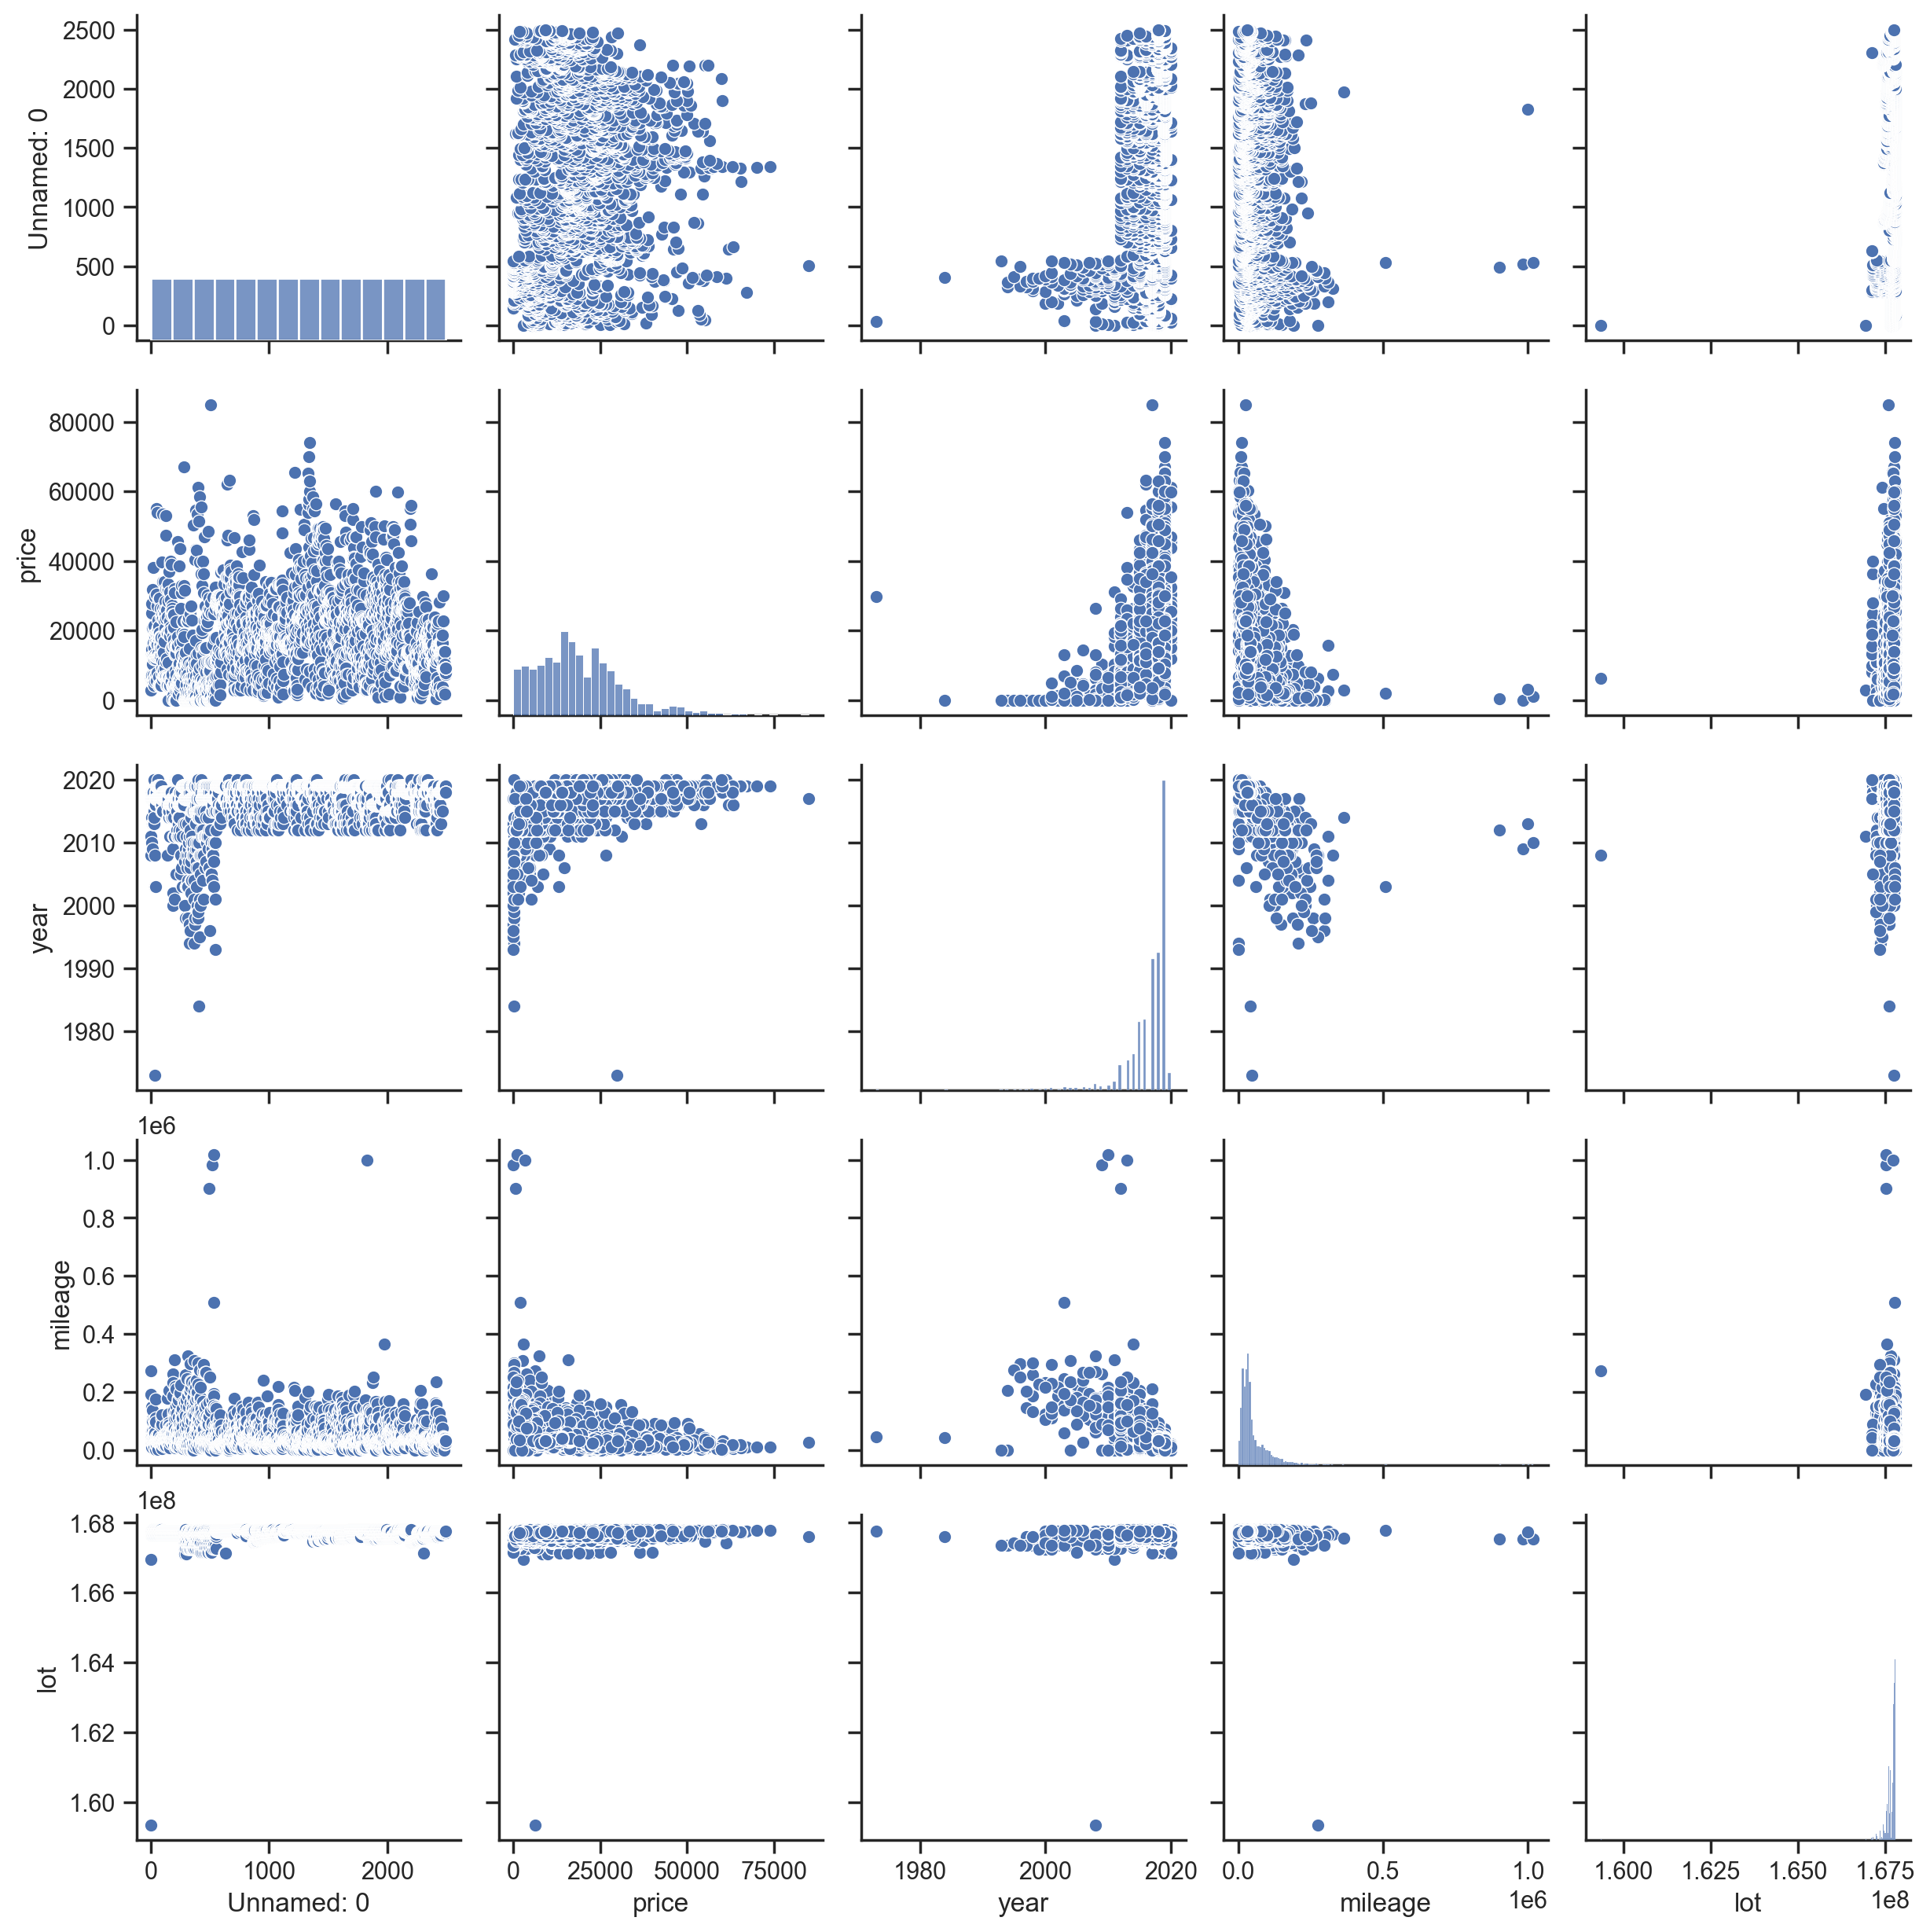

In [14]:
sns.pairplot(data)

# Корреляции признаков

In [15]:
corr_matrix = data.corr()

ValueError: could not convert string to float: 'toyota'

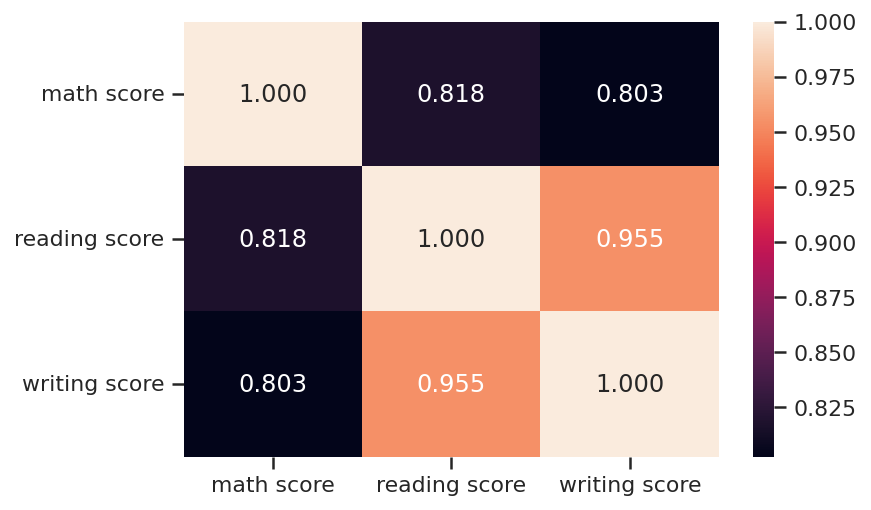

In [ ]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')